## Observations and Insights 

In [ ]:
#Observations

#1 A nearly even amount of Female and Male mice were entered into the study

#2 Ramicane and Capomulin were the most frequently tested, but all regimens had at least 148 observations

#3 A mouses weight and tumor volume are highly, postively correlated (.95)

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study = study_results.merge(mouse_metadata, how = "inner", on = "Mouse ID")

# Display the data table for preview

mouse_study


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.

num_mice = mouse_study["Mouse ID"].unique()

len(num_mice)


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_clean_first = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep='first')]
mouse_study_clean_last= mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep='last')]

mouse_study_clean_first


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_study_clean_last

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_clean = mouse_study[mouse_study["Mouse ID"] != "g989"]

mouse_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice in the clean DataFrame.

num_mice_clean = mouse_study_clean["Mouse ID"].unique()

len(num_mice_clean)

#confirmed that only mouse was removed

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_study_summary = mouse_study_clean.groupby("Drug Regimen")

tumor_mean = mouse_study_summary["Tumor Volume (mm3)"].mean()

tumor_median = mouse_study_summary["Tumor Volume (mm3)"].median()

tumor_var = mouse_study_summary["Tumor Volume (mm3)"].var()

tumor_stddev = mouse_study_summary["Tumor Volume (mm3)"].std()

tumor_sem = mouse_study_summary["Tumor Volume (mm3)"].sem()

drug_regimens = mouse_study_clean["Drug Regimen"].unique()

sum_table = pd.DataFrame({"Mean":tumor_mean, "Median": tumor_median, "Variance": tumor_var, "Standard Deviation":tumor_stddev, 
                          "SEM": tumor_sem})

sum_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mouse_study_summary2 = mouse_study_clean.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})

mouse_study_summary2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

(0.0, 300.0)

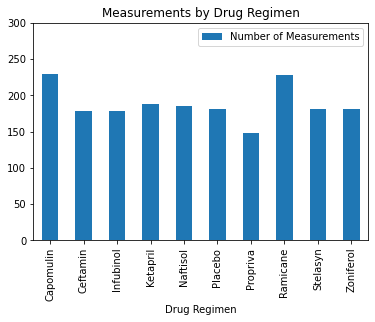

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

tumor_count = mouse_study_summary['Tumor Volume (mm3)'].count()

tumor_count_df = pd.DataFrame({'Number of Measurements':tumor_count})

tumor_count_chart = tumor_count_df.plot(kind = "bar", title = "Measurements by Drug Regimen")

tumor_count_chart.set_ylim([0,300])


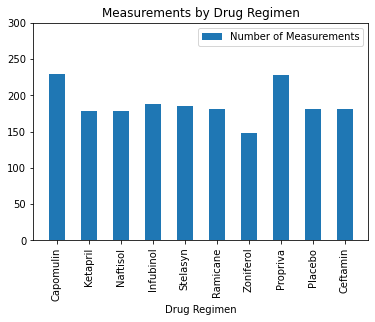

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(drug_regimens, tumor_count, width = 0.5)
plt.title("Measurements by Drug Regimen")
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.legend(['Number of Measurements'])
plt.ylim([0,300])
plt.show()


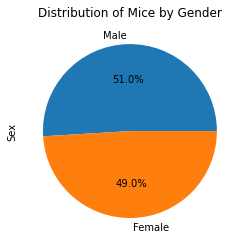

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender_summary = mouse_study_clean["Sex"].value_counts()

gender_chart = mouse_gender_summary.plot(kind = "pie", title = "Distribution of Mice by Gender",
                                        autopct='%1.1f%%', shadow=False, startangle=0)


Text(0, 0.5, 'Sex')

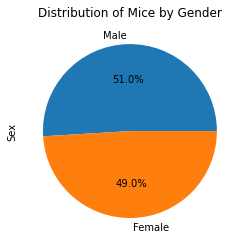

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_gender_summary,labels = ["Male","Female"],autopct='%1.1f%%')
plt.title("Distribution of Mice by Gender")
plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

latest_meas = mouse_study_clean.groupby("Mouse ID").agg({'Timepoint': 'max'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

latest_meas_df = latest_meas.merge(mouse_study_clean,how = 'inner', on = ['Mouse ID', 'Timepoint'])


In [34]:
# Put treatments into a list for for loop (and later for plot labels)

select_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_vol = [[row['Drug Regimen'],row['Tumor Volume (mm3)']] for regimen in select_regimens 
            for index, row in latest_meas_df.iterrows() 
            if latest_meas_df.loc[index, "Drug Regimen"] == regimen]

tumor_vol_df = pd.DataFrame(tumor_vol,columns=['Drug Regimen','Tumor Volume (mm3)'])


In [67]:
#create df for each drug
cap_data = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Capomulin']
ram_data = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Ramicane']
inf_data = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Infubinol']
cef_data = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Ceftamin']

#show the quartiles for each drug
cap_sum = cap_data.describe()
ram_sum = ram_data.describe()
inf_sum = inf_data.describe()
cef_sum = cef_data.describe()

print(cap_sum)
print(ram_sum)
print(inf_sum)
print(cef_sum)


       Tumor Volume (mm3)
count           25.000000
mean            36.667568
std              5.715188
min             23.343598
25%             32.377357
50%             38.125164
75%             40.159220
max             47.685963
       Tumor Volume (mm3)
count           25.000000
mean            36.191390
std              5.671539
min             22.050126
25%             31.560470
50%             36.561652
75%             40.659006
max             45.220869


(10.0, 80.0)

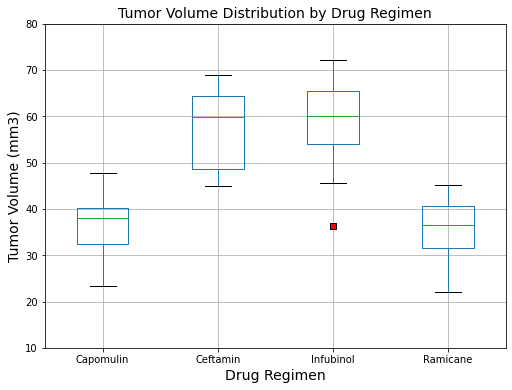

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_square = dict(markerfacecolor='r', marker='s')
tumor_vol_chart = tumor_vol_df.boxplot(by='Drug Regimen',figsize = (8,6),flierprops=red_square)
tumor_vol_chart.set_title("Tumor Volume Distribution by Drug Regimen", fontsize = 14)
plt.suptitle('')
tumor_vol_chart.set_xlabel("Drug Regimen", fontsize = 14)
tumor_vol_chart.set_ylabel("Tumor Volume (mm3)", fontsize = 14)
tumor_vol_chart.set_ylim(10,80)



## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Size Overtime for Mouse b128')

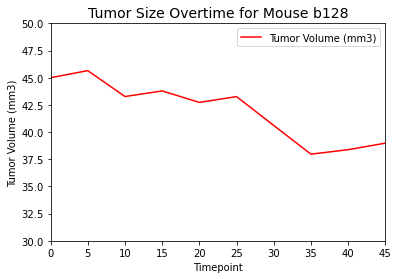

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# selected mouse is b128

tumor_time_df = mouse_study_clean.loc[mouse_study_clean['Mouse ID'] == "b128",['Mouse ID','Timepoint','Tumor Volume (mm3)']]

tumor_time_df

tumor_time_chart = tumor_time_df.plot(x = 'Timepoint', y = 'Tumor Volume (mm3)',color = 'red',figsize = (6,4))
tumor_time_chart.set_xlim(0,45)
tumor_time_chart.set_ylim(30,50)
tumor_time_chart.set_ylabel("Tumor Volume (mm3)")
tumor_time_chart.set_title("Tumor Size Overtime for Mouse b128",fontsize = 14)



Text(0.5, 1.0, 'Average Weight by Tumor Volume')

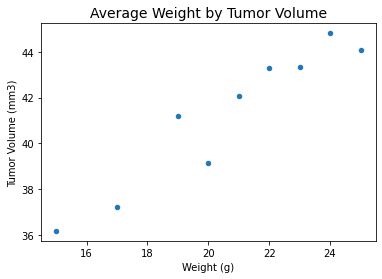

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

vol_weight_df = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == "Capomulin",
                                      ['Weight (g)','Tumor Volume (mm3)']]

group_weight_df = vol_weight_df.groupby('Weight (g)').mean()
reset_df = group_weight_df.reset_index()


reset_df.plot.scatter(x ='Weight (g)', y = 'Tumor Volume (mm3)')
plt.title("Average Weight by Tumor Volume",fontsize = 14)



## Correlation and Regression

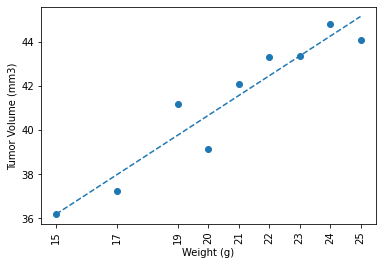

(0.9505243961855266, 8.449451040646425e-05)


In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



weight = reset_df['Weight (g)']
volume = reset_df['Tumor Volume (mm3)']
correl = st.pearsonr(weight, volume)

m_slope, m_int, m_r, m_p, m_std_err = st.linregress(weight, volume)
m_fit = m_slope * weight + m_int

plt.scatter(weight,volume)
plt.xticks(weight, rotation=90)
plt.plot(weight,m_fit,"--")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

print(correl)